In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import glob
import os

## 6.1

In [2]:
path ='C:/Users/Kunal/Documents/Summers/Intern/Large_Cap'
all_files = glob.glob(os.path.join(path, '*.csv'))
dfl = pd.DataFrame()

for csv in all_files:
    df = pd.read_csv(csv)
    dfl[os.path.basename(csv).split('.')[0]] = df['Close Price']

In [3]:
dfl = dfl.iloc[:, :-10 ]

In [4]:
dfl.head(3)

,ADANIPORTS,ASIANPAINT,AXISBANK,BAJFINANCE,BPCL,CIPLA,DRREDDY,EICHERMOT,GAIL,HDFC,HDFCBANK,HEROMOTOCO,HINDALCO,HINDUNILVR,INFRATEL
0,356.20,1148.05,500.1,1332.95,727.85,569.00,2675.8,28930.60,414.0,1559.50,1553.40,3515.45,198.45,983.25,371.05
1,354.50,1142.85,501.5,1347.75,733.30,565.60,2724.1,29362.50,411.4,205.00,1583.00,3619.40,196.50,1000.40,376.55
2,348.55,1154.95,502.8,1324.80,727.45,562.35,2736.9,29093.55,408.3,1566.55,1559.65,3645.95,198.85,1009.40,389.90


In [5]:
path ='C:/Users/Kunal/Documents/Summers/Intern/Small_Cap'
all_files = glob.glob(os.path.join(path, '*.csv'))
dfs = pd.DataFrame()

for csv in all_files:
    df = pd.read_csv(csv)
    dfs[os.path.basename(csv).split('.')[0]] = df['Close Price']

In [6]:
dfs = dfs.iloc[:, :-10 ]

In [7]:
dfs.head(3)

,ASHOKA,BAJAJELEC,BOMDYEING,CENTURYPLY,FORTIS,GUJALKALI,IDFC,IRCON,ITDC,JETAIRWAYS,JKLAKSHMI,LALPATHLAB,LAXMIMACH,LEMONTREE,LUXIND
0,216.05,341.15,82.20,266.65,205.25,457.35,63.70,415.3,650.15,527.50,510.8,900.60,4614.05,71.65,819.6
1,214.90,347.00,83.40,266.10,207.90,455.25,64.25,427.0,636.70,534.15,527.5,910.95,4589.80,66.85,817.5
2,217.00,349.85,82.25,264.85,205.90,472.65,63.35,421.4,626.75,528.90,516.2,911.70,4637.25,66.95,819.8


In [8]:
path ='C:/Users/Kunal/Documents/Summers/Intern/Mid_Cap'
all_files = glob.glob(os.path.join(path, '*.csv'))
dfm = pd.DataFrame()

for csv in all_files:
    df1 = pd.read_csv(csv)
    #df = df[df.Series == 'EQ']
    dfm[os.path.basename(csv).split('.')[0]] = df1['Close Price']

In [9]:
dfm = dfm.iloc[:, :-10 ]

In [10]:
dfnew = pd.concat([dfl , dfs, dfm], axis =1)

In [11]:
dfnew.head(2)

,ADANIPORTS,ASIANPAINT,AXISBANK,BAJFINANCE,BPCL,CIPLA,DRREDDY,EICHERMOT,GAIL,HDFC,...,ITDC,JETAIRWAYS,JKLAKSHMI,LALPATHLAB,LAXMIMACH,LEMONTREE,LUXIND,ADANIPOWER,AJANTPHARM,AMARAJABAT
0,356.2,1148.05,500.1,1332.95,727.85,569.0,2675.8,28930.6,414.0,1559.5,...,650.15,527.50,510.8,900.60,4614.05,71.65,819.6,30.25,1633.50,933.4
1,354.5,1142.85,501.5,1347.75,733.30,565.6,2724.1,29362.5,411.4,205.0,...,636.70,534.15,527.5,910.95,4589.80,66.85,817.5,32.85,1634.25,924.7


## 6.2

In [22]:
from math import *
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from scipy.cluster.vq import kmeans,vq
from pylab import plot,show, legend

In [14]:
returns = dfnew.pct_change().mean() * 252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = dfnew.pct_change().std() * sqrt(252)

In [15]:
returns.head(3)

,Returns,Volatility
ADANIPORTS,0.060376,0.309436
ASIANPAINT,0.097791,0.209249
AXISBANK,0.232722,0.277636


## 6.3

Text(0.5,1,'Elbow curve')

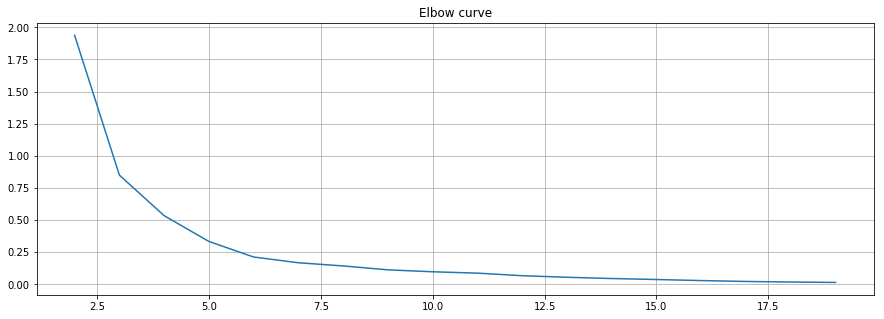

In [16]:
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T
X = data
distorsions = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distorsions.append(k_means.inertia_)
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

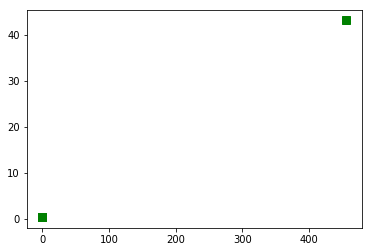

In [17]:
# computing K-Means with K = 5 (5 clusters)
centroids,_ = kmeans(data,3)
# assign each sample to a cluster
idx,_ = vq(data,centroids)
# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

In [18]:
print(returns.idxmax())

Returns       HDFC
Volatility    HDFC
dtype: object


In [19]:
returns.drop('HDFC',inplace=True)
#recreate data to feed into the algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

No handles with labels found to put in legend.


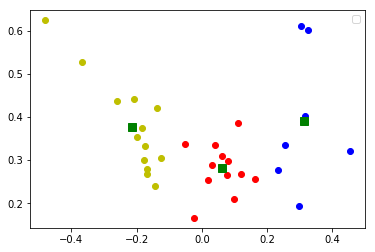

In [23]:
# computing K-Means with K = 5 (5 clusters)
centroids,_ = kmeans(data,3)
# assign each sample to a cluster
idx,_ = vq(data,centroids)
# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
#legend(loc= 'upper right')
show()

In [21]:
details = [(name,cluster) for name, cluster in zip(returns.index,idx)]
for detail in details:
    print(detail)

('ADANIPORTS', 1)
('ASIANPAINT', 1)
('AXISBANK', 2)
('BAJFINANCE', 2)
('BPCL', 0)
('CIPLA', 1)
('DRREDDY', 1)
('EICHERMOT', 0)
('GAIL', 1)
('HDFCBANK', 1)
('HEROMOTOCO', 0)
('HINDALCO', 1)
('HINDUNILVR', 2)
('INFRATEL', 0)
('ASHOKA', 0)
('BAJAJELEC', 2)
('BOMDYEING', 2)
('CENTURYPLY', 0)
('FORTIS', 0)
('GUJALKALI', 1)
('IDFC', 0)
('IRCON', 1)
('ITDC', 0)
('JETAIRWAYS', 0)
('JKLAKSHMI', 0)
('LALPATHLAB', 1)
('LAXMIMACH', 1)
('LEMONTREE', 1)
('LUXIND', 2)
('ADANIPOWER', 2)
('AJANTPHARM', 0)
('AMARAJABAT', 0)
